In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from pqcd.utils import (
    to_nucleons_per_cubic_femtometre,
    nsat
    )

from plot_utils import (
    rcparams,
    x_cn,
    xlim_cn,
    ylim_cn
)
plt.rcParams.update(rcparams)

### pQCD only, GP0

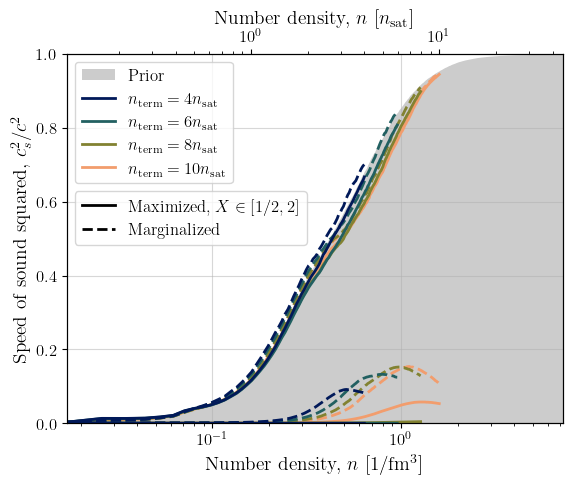

In [2]:
fig, ax = plt.subplots()
ax.set_xscale('log')

# Prior
# -----

quantiles = pd.read_csv(
    '../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_prior.csv'
)
ax.fill_between(
    x_cn,
    quantiles.loc[5,:].values,
    quantiles.loc[95,:].values,
    color='k',
    alpha=0.2,
    linewidth=0,
    label='Prior',
    zorder=0.1
)

# Maximized, Xmarg
# ----------------

nterms = [4, 6, 8, 10]

for i, nterm in enumerate(nterms):

    lw = 2
    mask = x_cn < nterm*nsat
    zorder = 10 - i

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_pqcd_{nterm:02}nsat_Xmarg_mu2.6.csv'
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[5,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        label=f'$n_\mathrm{{term}} = {nterm} n_\mathrm{{sat}}$',
        zorder=zorder
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[95,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        zorder=zorder
    )

for i, nterm in enumerate(nterms):

    lw = 2
    ls = '--'
    mask = x_cn < nterm*nsat
    zorder = 10 - i

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_pqcd_{nterm:02}nsat_marg.csv'
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[5,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        ls=ls,
        zorder=zorder
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[95,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        ls=ls,
        zorder=zorder
    )

# ---

l1 = ax.legend()
ax.add_artist(l1)
ax.grid(True, which='major', alpha=0.5)

# Add a second legend for the dashed lines
handles = [
    plt.Line2D([0], [0], color='k', lw=2, ls='-'),
    plt.Line2D([0], [0], color='k', lw=2, ls='--')
]
labels = [
    'Maximized, $X \in [1/2,2]$',
    'Marginalized'
]
l2 = ax.legend(
    handles, 
    labels, loc='upper left',
    bbox_to_anchor=(0.0, 0.65),
    )

# ---

ax.set_xlim(xlim_cn)
ax.set_ylim(ylim_cn)

ax.set_xlabel('Number density, $n$ [1/fm$^3$]')
ax.set_ylabel('Speed of sound squared, $c_s^2/c^2$')

# ---

twiny = ax.twiny()
twiny.set_xscale('log')
twiny.set_xlim(np.array(ax.get_xlim())/nsat)
twiny.set_xlabel('Number density, $n$ [$n_\mathrm{sat}$]');

## Astro + pQCD, GP0

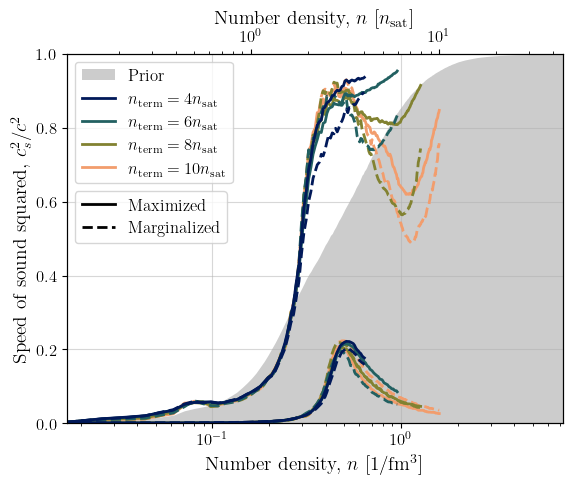

In [3]:
fig, ax = plt.subplots()
ax.set_xscale('log')

# Prior
# -----

quantiles = pd.read_csv(
    '../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_prior.csv'
)
ax.fill_between(
    x_cn,
    quantiles.loc[5,:].values,
    quantiles.loc[95,:].values,
    color='k',
    alpha=0.2,
    linewidth=0,
    label='Prior',
    zorder=0.1
)

# Maximized, Xmarg
# ----------------

nterms = [4, 6, 8, 10]

for i, nterm in enumerate(nterms):

    lw = 2
    mask = x_cn < nterm*nsat
    zorder = 10 - i

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_astro_pqcd_{nterm:02}nsat_Xmarg_mu2.6.csv'
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[5,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        label=f'$n_\mathrm{{term}} = {nterm} n_\mathrm{{sat}}$',
        zorder=zorder
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[95,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        zorder=zorder
    )

for i, nterm in enumerate(nterms):

    lw = 2
    ls = '--'
    mask = x_cn < nterm*nsat
    zorder = 10 - i

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles/cs2_of_rho_quantiles_astro_pqcd_{nterm:02}nsat_marg.csv'
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[5,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        ls=ls,
        zorder=zorder
    )

    ax.plot(
        x_cn[mask],
        quantiles.loc[95,:].values[mask],
        color=cm.batlow(i/len(nterms)),
        lw=lw,
        ls=ls,
        zorder=zorder
    )

# ---

l1 = ax.legend()
ax.add_artist(l1)
ax.grid(True, which='major', alpha=0.5)

# Add a second legend for the dashed lines
handles = [
    plt.Line2D([0], [0], color='k', lw=2, ls='-'),
    plt.Line2D([0], [0], color='k', lw=2, ls='--')
]
labels = [
    'Maximized',
    'Marginalized'
]
l2 = ax.legend(
    handles, 
    labels, loc='upper left',
    bbox_to_anchor=(0.0, 0.65),
    )

# ---

ax.set_xlim(xlim_cn)
ax.set_ylim(ylim_cn)

ax.set_xlabel('Number density, $n$ [1/fm$^3$]')
ax.set_ylabel('Speed of sound squared, $c_s^2/c^2$')

# ---

twiny = ax.twiny()
twiny.set_xscale('log')
twiny.set_xlim(np.array(ax.get_xlim())/nsat)
twiny.set_xlabel('Number density, $n$ [$n_\mathrm{sat}$]');

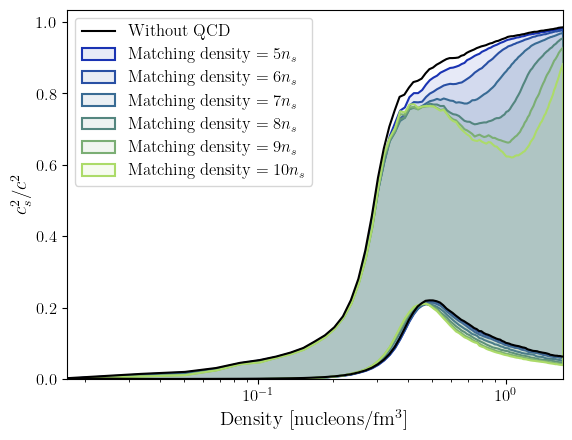

In [4]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

ns_list = [5,6,7,8,9,10]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles_{ns:02}nsat_Xmarg.csv'
    )

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.1], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        label=f'Matching density $={ns}n_s$'
        )

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_Xmarg.pdf', 
    bbox_inches='tight'
    )

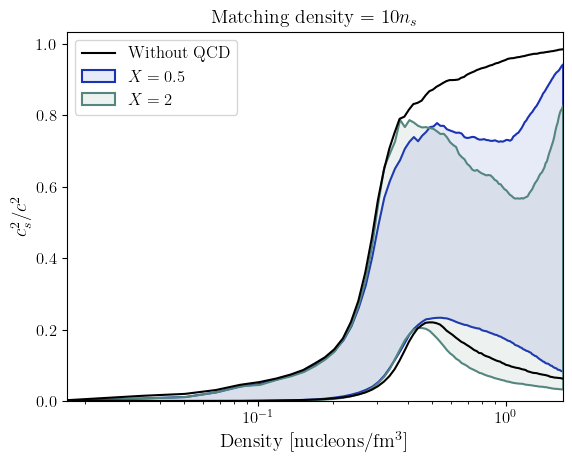

In [5]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

ns = 10
X_list = [0.5, 2]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles_{ns:02}nsat_X{X}.csv'
    )

    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(X_list))))[:3]+[0.1], 
        edgecolor=cm.imola(i/(len(X_list))),
        linewidth=1.5,
        label=f'$X={X}$'
        )

# ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_title(f'Matching density $={ns:02}n_s$')
ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    f'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_{ns:02}nsat_Xcomparison.pdf', 
    bbox_inches='tight'
    )

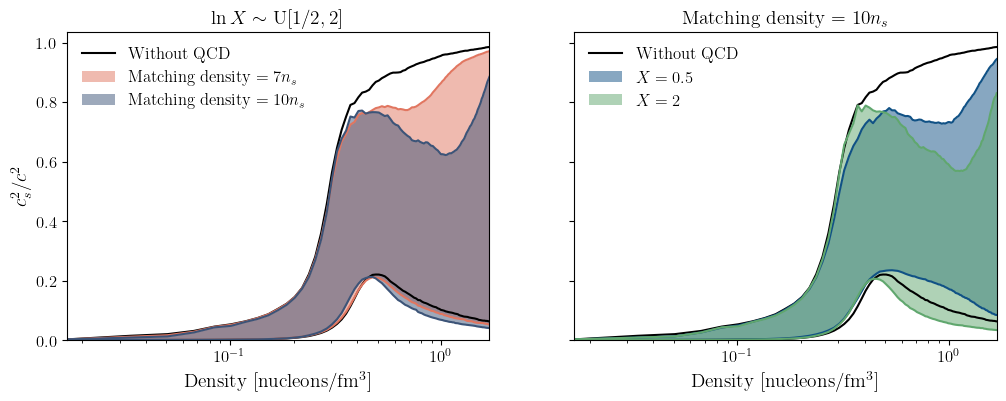

In [6]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))
axs[0].set_xscale('log')

x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

quantiles = pd.read_csv('../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles.csv')

for ax in axs:
    ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
    ax.plot(x, quantiles.loc[95,:].values, color='k')

axs[0].set_title('$\ln{X} \sim \mathrm{U}[1/2,2]$')

ns_list = [7,10]
c_list = [cm.lipari(0.65), cm.lipari(0.2)]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles_{ns:02}nsat_Xmarg.csv'
    )

    axs[0].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'Matching density $={ns}n_s$'
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[0].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )


ns = 10
axs[1].set_title(f'Matching density $={ns:02}n_s$')

X_list = [0.5, 2]
c_list = [cm.navia(0.2), cm.navia(0.65)]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(
        f'../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles_{ns:02}nsat_X{X}.csv'
    )

    axs[1].fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=c_list[i], 
        alpha=0.5,
        linewidth=0,
        label=f'$X={X}$'
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[5,:].values,
        color=c_list[i],
        zorder=2
        )
    
    axs[1].plot(
        x, 
        quantiles.loc[95,:].values,
        color=c_list[i],
        zorder=2
        )

axs[0].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', frameon=False)

axs[0].set_xlim(x[0], x[-1])
axs[0].set_ylim(0)

axs[0].set_xlabel('Density [nucleons/fm$^3$]')
axs[1].set_xlabel('Density [nucleons/fm$^3$]')
axs[0].set_ylabel('$c_s^2/c^2$')

fig.savefig(
    'figures/speed_of_sound_vs_density/speed_of_sound_vs_density.pdf', 
    bbox_inches='tight'
    )


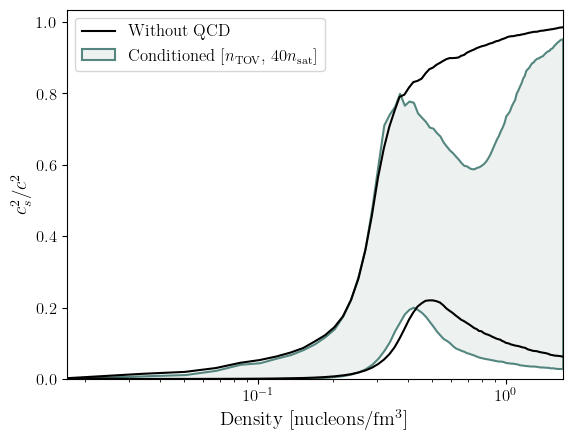

In [7]:
x = to_nucleons_per_cubic_femtometre(np.linspace(2.8e13, 2.8e15, 100))

fig, ax = plt.subplots()
ax.set_xscale('log')

quantiles = pd.read_csv('../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles.csv')
ax.plot(x, quantiles.loc[5,:].values, c='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, c='k')

quantiles = pd.read_csv(
    '../data/eos-draws-default/quantiles.old/cs2_of_rho_quantiles_ntov_marg.csv'
)

ax.fill_between(
    x, 
    quantiles.loc[5,:].values, 
    quantiles.loc[95,:].values, 
    color=list(cm.imola(1/2))[:3]+[0.1], 
    edgecolor=cm.imola(1/2),
    linewidth=1.5,
    label='Conditioned [$n_\mathrm{TOV}$, $40n_\mathrm{sat}$]',
    )

# ax.axvline(0.15, c='k')

ax.legend(loc='upper left')

ax.set_ylim(0)
ax.set_xlim(x[0], x[-1])

ax.set_xlabel('Density [nucleons/fm$^3$]')
ax.set_ylabel('$c_s^2/c^2$')

fig.savefig(
    f'figures/speed_of_sound_vs_density/speed_of_sound_vs_density_marg.pdf', 
    bbox_inches='tight'
    )